In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


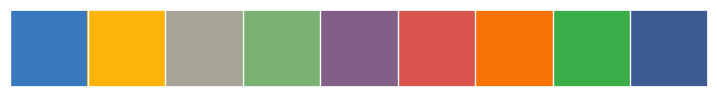

In [55]:
import seaborn as sns

# Set the style and font family
sns.set_style("white")
sns.set(font='sans-serif')

# Your plotting code here
sample_color =["windows blue", "amber", "greyish", "faded green", "dusty purple","pale red","orange","medium green","denim blue"]

sns.palplot(sns.xkcd_palette(sample_color))


In [3]:
# Importing Data with Features 
data_hedonic = pd.read_csv ('/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/Final Data/Hedonic_Final.csv')
data_utilitarian = pd.read_csv ('/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/Final Data/Utilitarian_Final.csv')

In [4]:
# Merging Data
data = pd.concat([data_hedonic, data_utilitarian])


# 2. Product Description

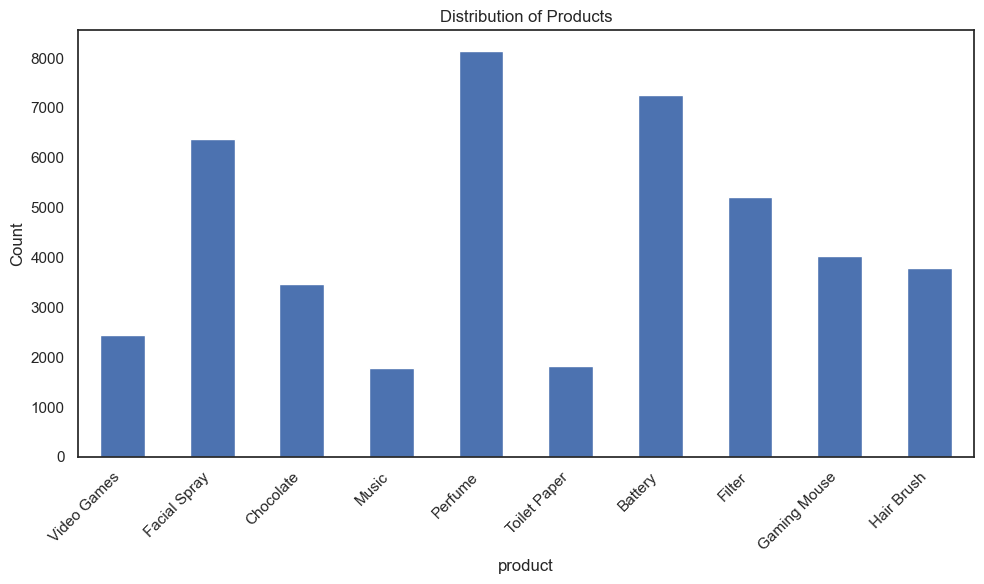

In [138]:
# Get the unique products
unique_products = data['product'].unique()

# Count the number of reviews for each product
product_counts = data['product'].value_counts().reindex(unique_products, fill_value=0)

plt.figure(figsize=(10, 6))
product_counts.plot(kind='bar')
plt.title('Distribution of Products')
plt.xlabel('product')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


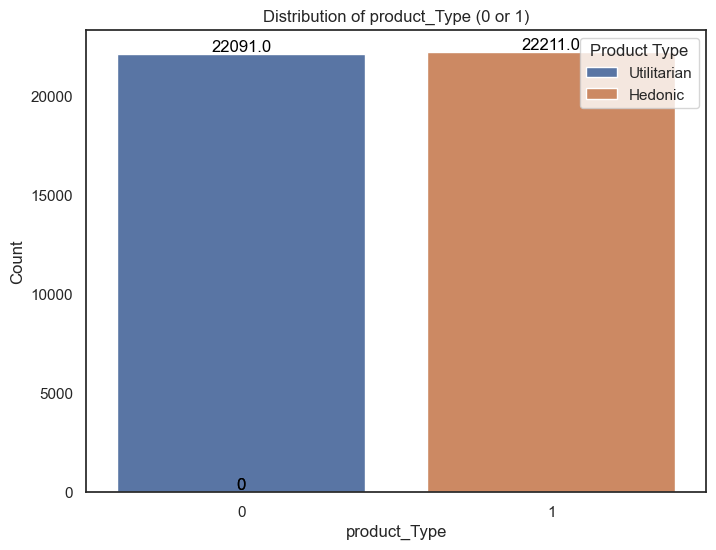

In [139]:
# Giving overview over the distribution of the product types 
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='prod_type', hue='prod_type')
plt.title('Distribution of product_Type (0 or 1)')
plt.xlabel('product_Type')
plt.ylabel('Count')
plt.xticks([0, 1], ['0', '1'])

# Adding labels on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                        textcoords='offset points')

plt.legend(title='Product Type', labels=['Utilitarian', 'Hedonic'])
plt.show()

In [56]:
# Function Building for analyzing the helpful votes by product type
def plot_votes_by_product_type(data):
    # Get unique product types
    product_types = data['product'].unique()

    # Initialize lists to store counts
    not_helpful_votes_counts = []
    helpful_votes_counts = []

    # Calculate counts for each product type
    for product_type in product_types:
        # Count of rows where helpful votes are zero for the current product type
        not_helpful_votes_count = data[(data['product'] == product_type) & (data['helpful_vote'] == 0)].shape[0]
        not_helpful_votes_counts.append(not_helpful_votes_count)

        # Count of rows where helpful votes are greater than zero for the current product type
        helpful_votes_count = data[(data['product'] == product_type) & (data['helpful_vote'] > 0)].shape[0]
        helpful_votes_counts.append(helpful_votes_count)

    # Create a DataFrame for plotting
    plot_data = pd.DataFrame({
        'Product': product_types,
        'Not helpful votes': not_helpful_votes_counts,
        'Helpful votes': helpful_votes_counts
    })

    # Melt the DataFrame for seaborn
    plot_data = plot_data.melt(id_vars='Product', var_name='Vote Type', value_name='Count')

    # Create a stacked bar chart using seaborn
    plt.figure(figsize=(12, 6), dpi=800)
    ax = sns.barplot(x='Product', y='Count', hue='Vote Type', data=plot_data,edgecolor="black", palette={'Not helpful votes': sns.xkcd_rgb['amber'], 'Helpful votes': sns.xkcd_rgb['faded green']})

    for i in ax.containers:
         ax.bar_label(i,)

    plt.xlabel('Product')
    plt.ylabel('Count')
    plt.title('Distribution of helpful reviews across product categories')
    plt.legend(title='Vote Type')

    # Display the plot
    plt.show()

In [27]:
#Function for calculating the review counts by product type/helpful votes 
def calculate_review_counts(data, category_column='product'):
    # Get unique categories
    categories = data[category_column].unique()

    # Initialize lists to store counts and categories
    categories_list = []
    not_helpful_votes_counts = []
    helpful_votes_counts = []
    total_reviews_counts = []

    # Calculate counts for each category
    for category in categories:
        # Check if the category exists in the DataFrame
        if category not in data[category_column].values:
            print(f"Category '{category}' not found in the DataFrame.")
            continue
        
        # Count of rows where helpful votes are zero for the current category
        not_helpful_votes_count = data[(data[category_column] == category) & (data['helpful_vote'] == 0)].shape[0]
        not_helpful_votes_counts.append(not_helpful_votes_count)
        
        # Count of rows where helpful votes are greater than zero for the current category
        helpful_votes_count = data[(data[category_column] == category) & (data['helpful_vote'] > 0)].shape[0]
        helpful_votes_counts.append(helpful_votes_count)
        
        # Append category to the list for DataFrame creation
        categories_list.append(category)

        # Total number of reviews for the current category
        total_reviews_count = not_helpful_votes_count + helpful_votes_count
        total_reviews_counts.append(total_reviews_count)

    # Calculate percentage of helpful votes
    total_votes_counts = [not_h + h for not_h, h in zip(not_helpful_votes_counts, helpful_votes_counts)]
    helpful_vote_percentages = [(h / total) * 100 if total != 0 else 0 for h, total in zip(helpful_votes_counts, total_votes_counts)]

    # Create DataFrame to store counts with categories
    counts_df = pd.DataFrame({
        category_column.capitalize(): categories_list,
        'Not Helpful Votes': not_helpful_votes_counts,
        'Helpful Votes': helpful_votes_counts,
        'Total Reviews': total_reviews_counts,
        'Helpful Votes Percentage': helpful_vote_percentages
    })

    # Display the DataFrame
    return(counts_df)


## 2. Helpfulness Analysis

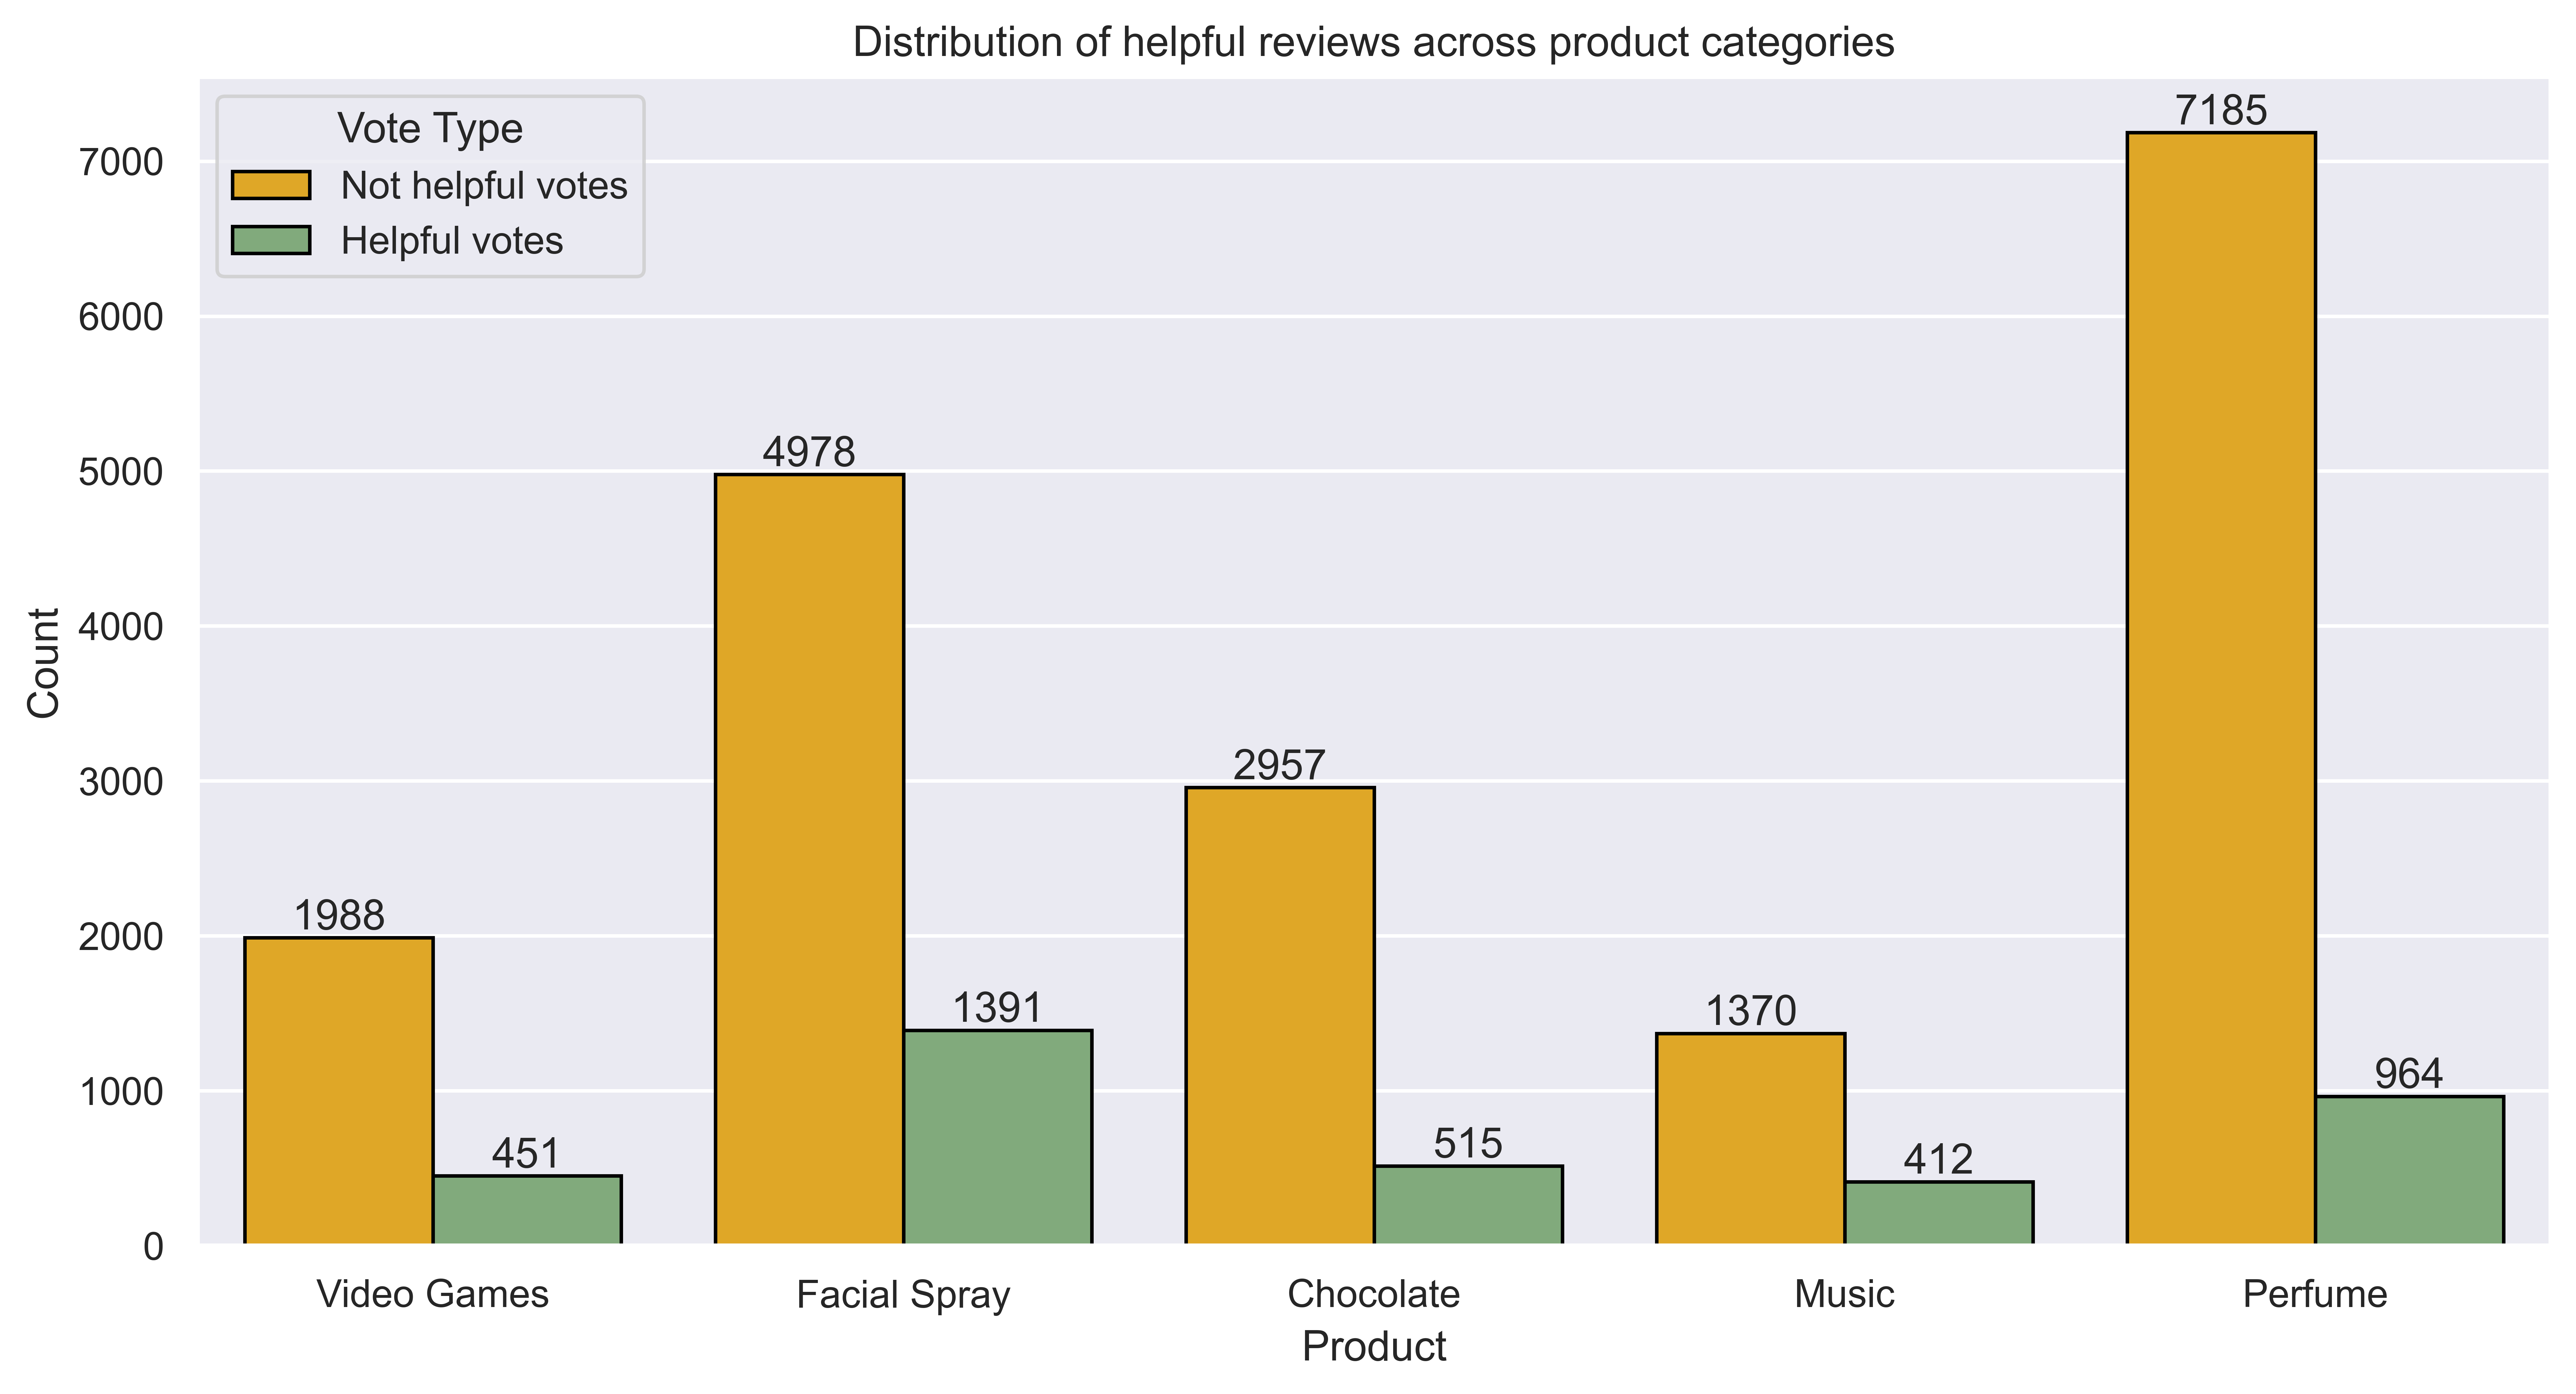

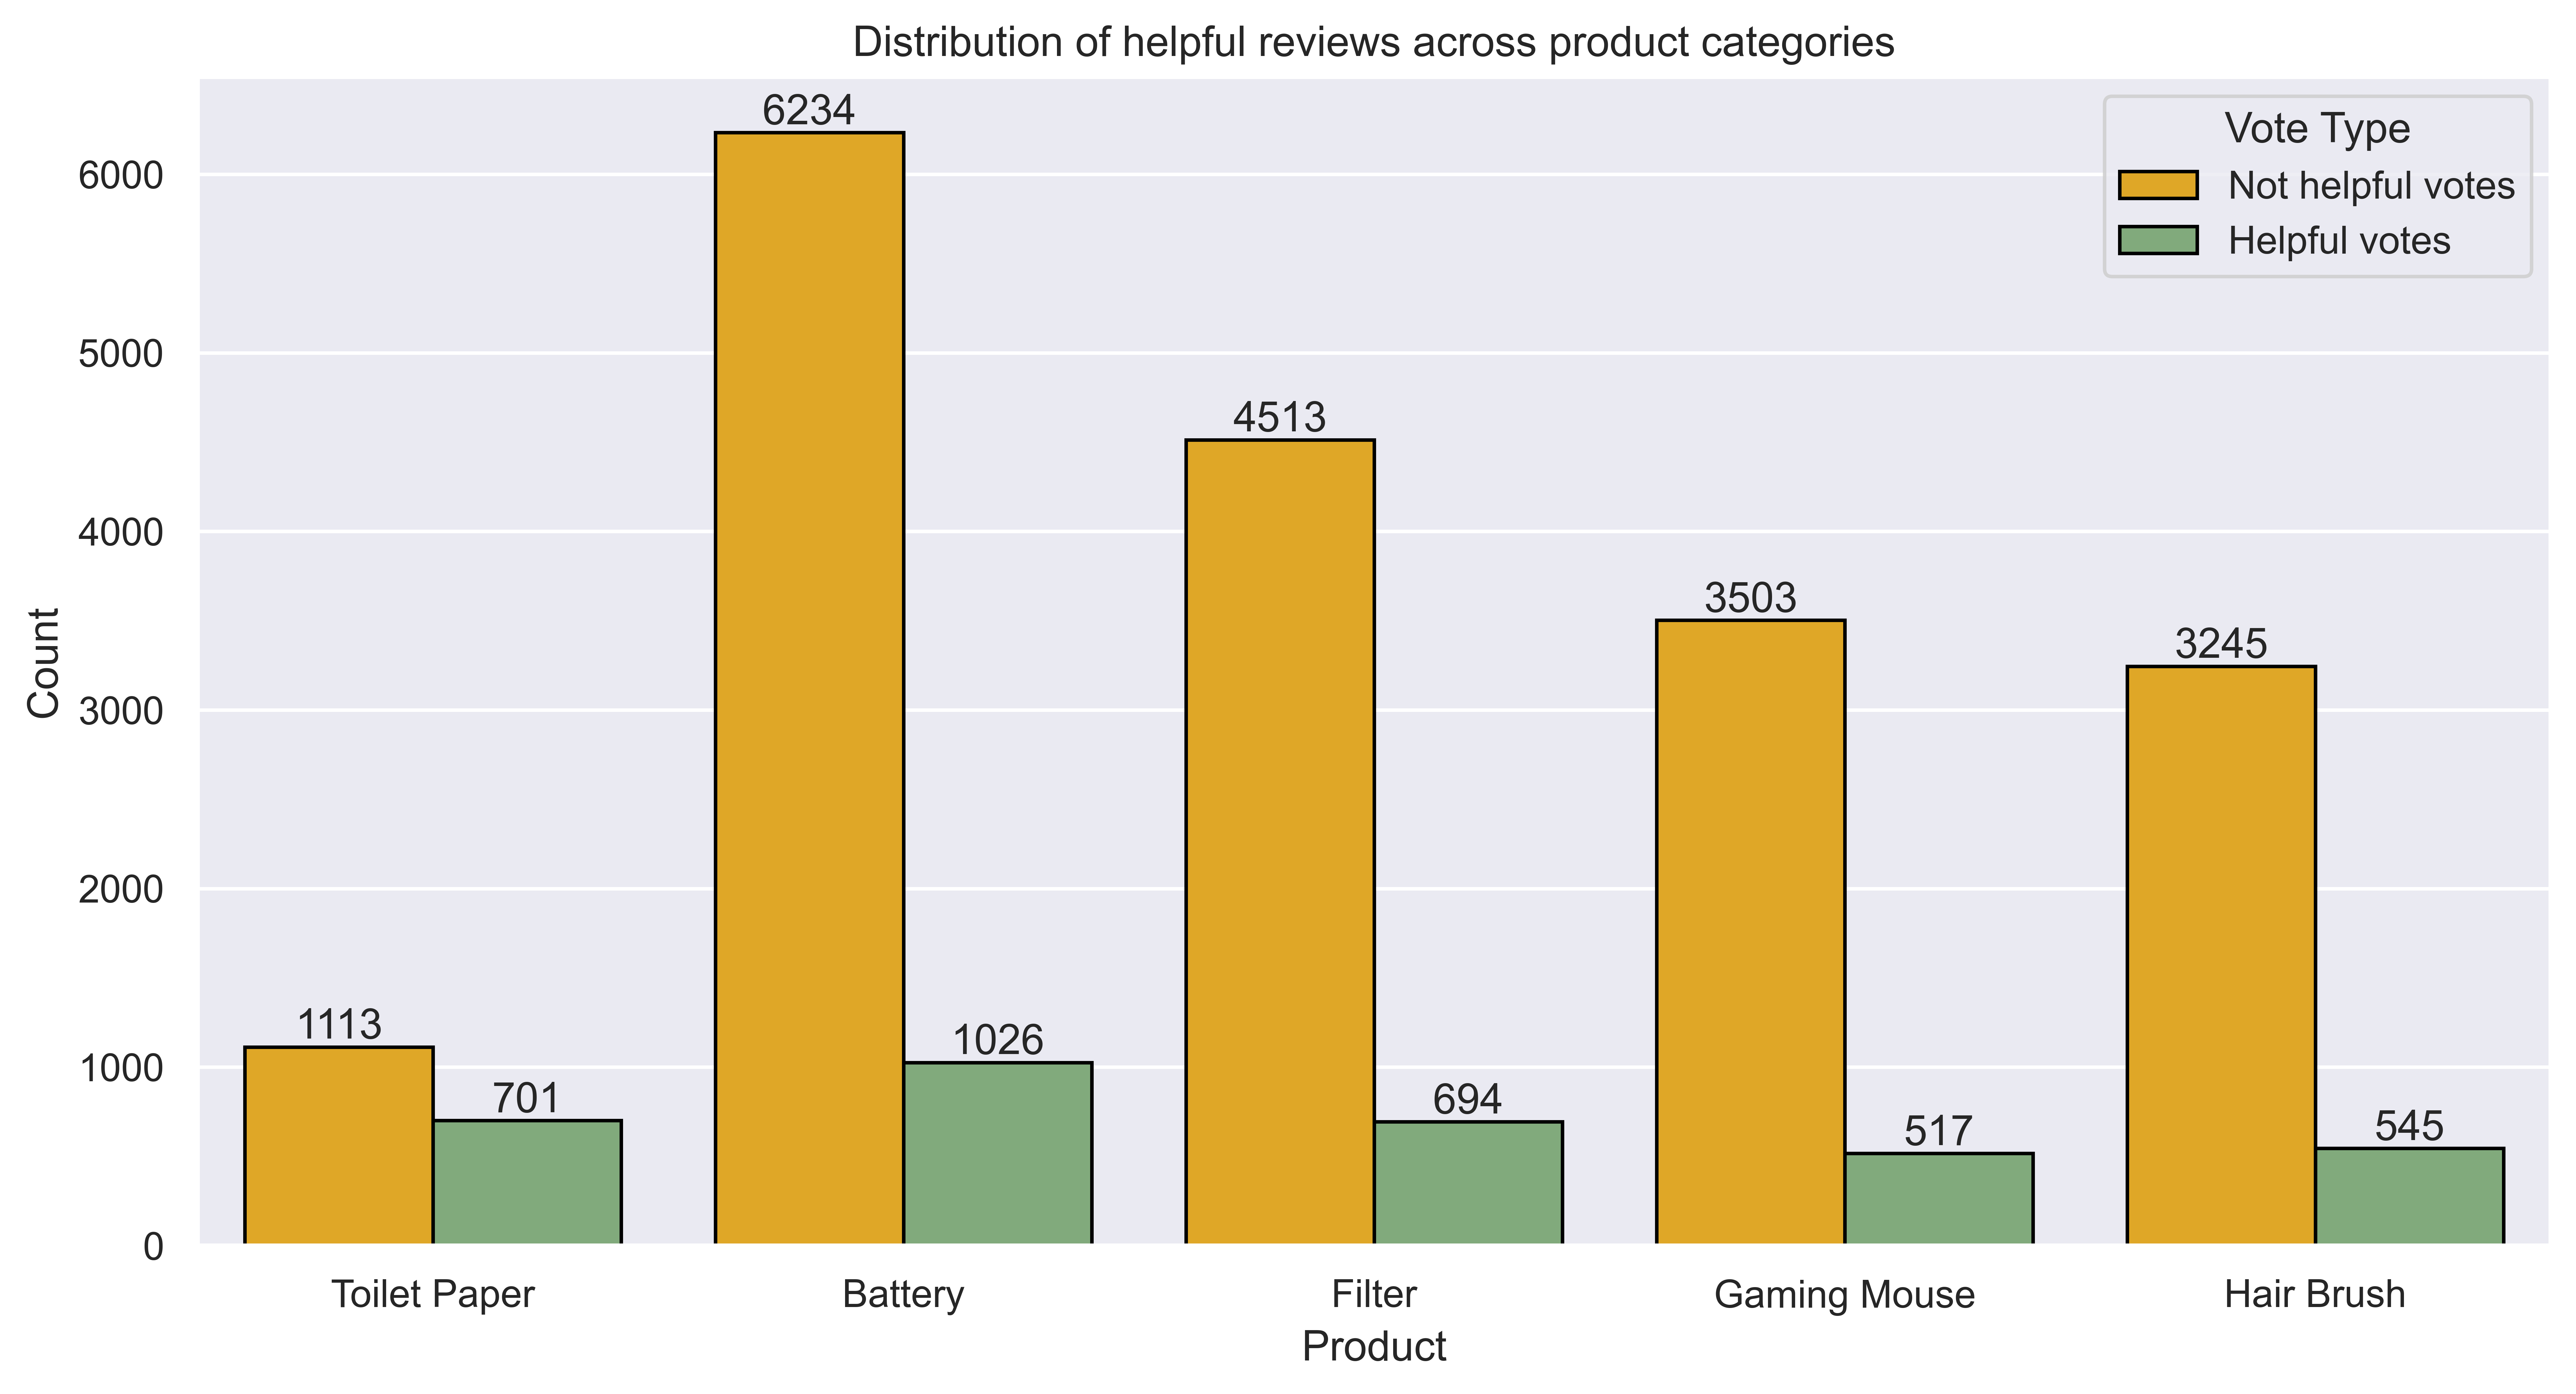

In [57]:
plot_votes_by_product_type (data_hedonic)
plot_votes_by_product_type (data_utilitarian)

In [137]:
import matplotlib.pyplot as plt
import pandas as pd

# Set the style
sns.set_style("white")

# Set font family
plt.rcParams['font.family'] = 'sans-serif'

# Get unique product types
product_types = data['product'].unique()

# Initialize lists to store counts
not_helpful_votes_counts = []
helpful_votes_counts = []

# Calculate counts for each product type
for product_type in product_types:
    # Count of rows where helpful votes are zero for the current product type
    not_helpful_votes_count = data[(data['product'] == product_type) & (data['helpful_vote'] == 0)].shape[0]
    not_helpful_votes_counts.append(not_helpful_votes_count)

    # Count of rows where helpful votes are greater than zero for the current product type
    helpful_votes_count = data[(data['product'] == product_type) & (data['helpful_vote'] > 0)].shape[0]
    helpful_votes_counts.append(helpful_votes_count)

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Product': product_types,
    'Not helpful votes': not_helpful_votes_counts,
    'Helpful votes': helpful_votes_counts
})

# Plotting
plt.figure(figsize=(12, 8),dpi=800)

# Bar width
bar_width = 0.8

# Calculate the position for each bar
index = range(len(product_types))

# Plot bars for 'Not helpful votes'
plt.bar(index, plot_data['Not helpful votes'], width=bar_width, color=sns.xkcd_rgb['amber'],edgecolor="grey" ,label='Not helpful reviews')

# Plot bars for 'Helpful votes' on top of 'Not helpful votes'
plt.bar(index, plot_data['Helpful votes'], bottom=plot_data['Not helpful votes'], width=bar_width, edgecolor="grey", color=sns.xkcd_rgb['faded green'],  label='Helpful reviews')

plt.ylabel('Count')
plt.xticks(index, product_types, rotation=45, ha='right',size=13)
plt.legend(title='Review Type')

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5, color='grey')
plt.show()


## Helpfulness Analysis Statistic

In [8]:
# Helpfulness Analysis for Hedonic Data after product 
review_counts_hed_prod = calculate_review_counts (data_hedonic, 'product')
print(review_counts_hed_prod)

#Saving to CSV
#review_counts_hed_prod.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Overview/Hedonic_Review_Counts_Prod.csv', index=False)

        Product  Not Helpful Votes  Helpful Votes  Total Reviews  \
0   Video Games               1988            451           2439   
1  Facial Spray               4978           1391           6369   
2     Chocolate               2957            515           3472   
3         Music               1370            412           1782   
4       Perfume               7185            964           8149   

   Helpful Votes Percentage  
0                 18.491185  
1                 21.840163  
2                 14.832949  
3                 23.120090  
4                 11.829672  


In [9]:
# Helpfulness Analysis for Hedonic Data after Main Category
review_counts_hed_cat = calculate_review_counts (data_hedonic, 'main_category')

#Print the results
print(review_counts_hed_cat)

#Saving to CSV
#review_counts_hed_cat.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Overview/Hedonic_Review_Counts_Cat.csv', index=False)

  Main_category  Not Helpful Votes  Helpful Votes  Total Reviews  \
0   Video Games               1988            451           2439   
1        Beauty              12163           2355          14518   
2       Grocery               2957            515           3472   
3         Music               1370            412           1782   

   Helpful Votes Percentage  
0                 18.491185  
1                 16.221243  
2                 14.832949  
3                 23.120090  


In [10]:
# Helpfulness Analysis for Utilitarian Data after Product Category
review_counts_uti_prod = calculate_review_counts (data_utilitarian, 'product')
print (review_counts_uti_prod)

#Saving to CSV
#review_counts_uti_prod.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Overview/Utilitarian_Review_Counts_Prod.csv', index=False)

        Product  Not Helpful Votes  Helpful Votes  Total Reviews  \
0  Toilet Paper               1113            701           1814   
1       Battery               6234           1026           7260   
2        Filter               4513            694           5207   
3  Gaming Mouse               3503            517           4020   
4    Hair Brush               3245            545           3790   

   Helpful Votes Percentage  
0                 38.643881  
1                 14.132231  
2                 13.328212  
3                 12.860697  
4                 14.379947  


In [11]:
# Helpfulness Analysis for Utilitarian Data after Main Category
review_counts_uti_cat = calculate_review_counts (data_utilitarian, 'main_category')

# print 
print (review_counts_uti_cat)

#  Saving to csv
#review_counts_uti_cat.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Overview/Utilitarian_Review_Counts_Cat.csv')

   Main_category  Not Helpful Votes  Helpful Votes  Total Reviews  \
0      Household               1113            701           1814   
1    Electronics               9737           1543          11280   
2     Appliances               4513            694           5207   
3  Personal Care               3245            545           3790   

   Helpful Votes Percentage  
0                 38.643881  
1                 13.679078  
2                 13.328212  
3                 14.379947  


## 3. Correlation Analysis

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


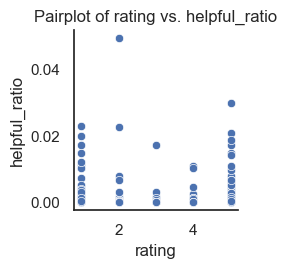

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


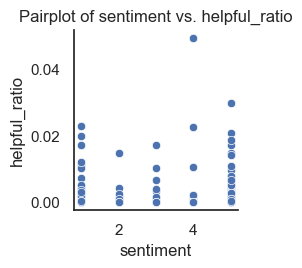

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


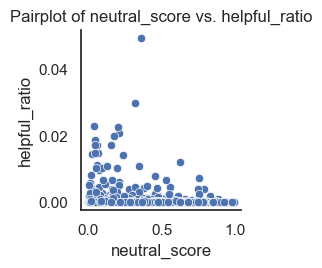

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


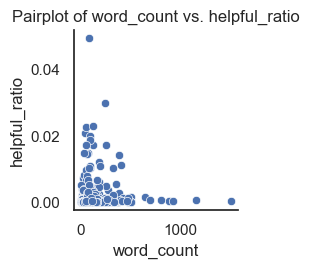

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


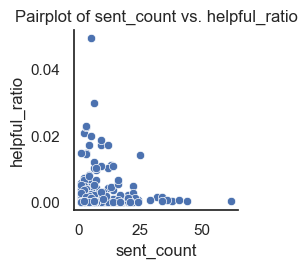

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


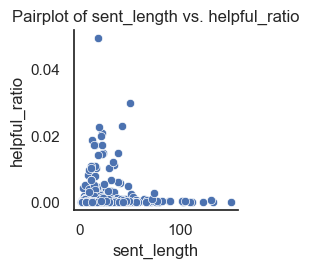

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


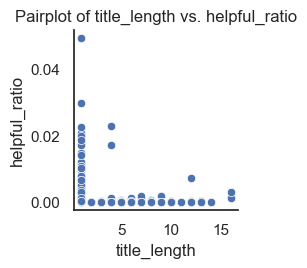

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


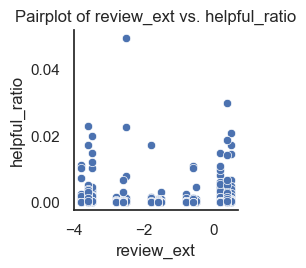

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


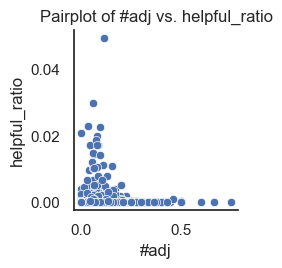

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


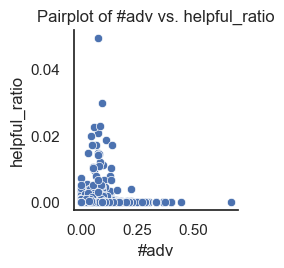

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


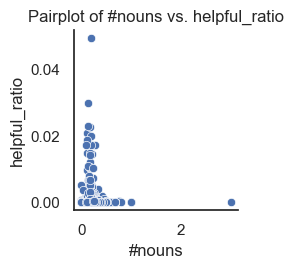

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


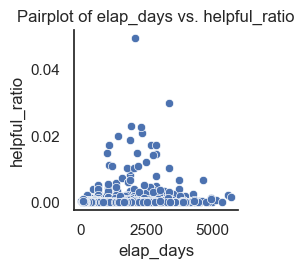

helpful_ratio    1.000000
word_count       0.126820
sent_count       0.106494
sent_length      0.082363
elap_days        0.057156
neutral_score    0.011372
#adv             0.003487
title_length     0.001049
#nouns          -0.015296
sentiment       -0.030020
#adj            -0.034414
review_ext      -0.048014
rating          -0.048502
Name: helpful_ratio, dtype: float64


In [140]:
# Determining Features 
features= ['rating', 'sentiment', 'neutral_score', 'word_count',  'sent_count', 'sent_length', 'title_length', 'review_ext', 
           '#adj', '#adv', '#nouns', 'elap_days']

# Pairplot: Visualizing pairwise relationships between features and the output variable

data_hedonic = data_hedonic [data_hedonic['helpful_vote'] != 0]

for covariate in features:
    sns.pairplot(data_hedonic, x_vars=[covariate], y_vars=['helpful_ratio'])
    plt.title(f'Pairplot of {covariate} vs. helpful_ratio')
    plt.show()

# Correlation between features and output variable
corr_with_output = data_hedonic[features + ['helpful_ratio']].corr()['helpful_ratio'].sort_values(ascending=False)
print(corr_with_output)

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


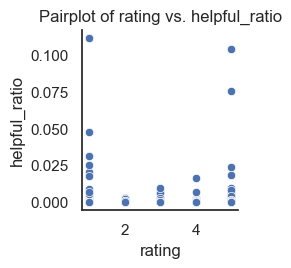

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


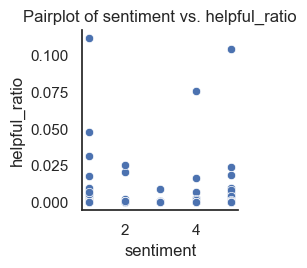

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


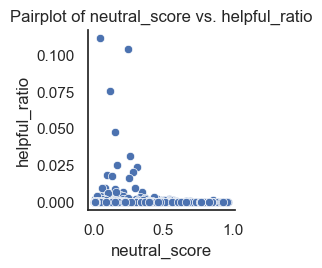

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


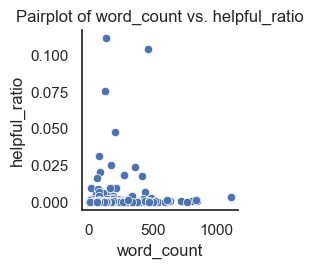

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


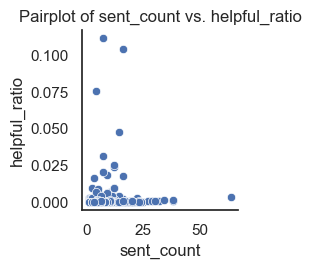

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


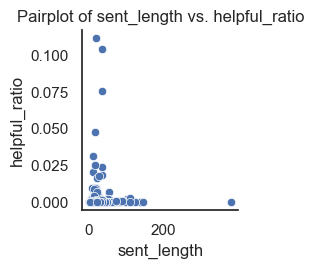

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


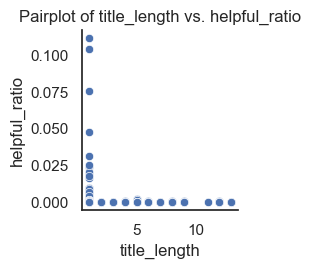

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


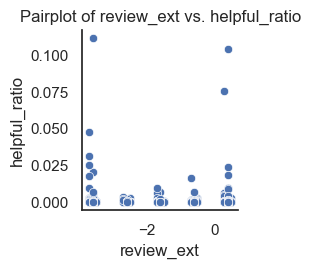

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


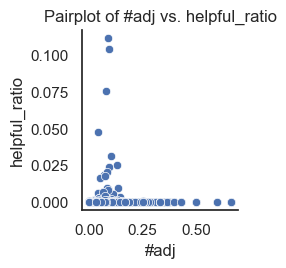

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


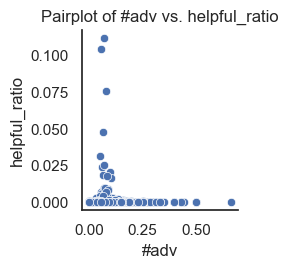

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


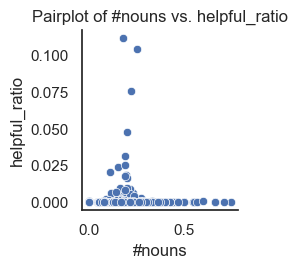

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


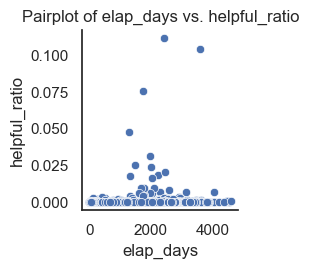

helpful_ratio    1.000000
word_count       0.126378
sent_count       0.096834
elap_days        0.063827
sent_length      0.044148
#nouns           0.006552
rating           0.001570
review_ext       0.000825
sentiment       -0.001095
#adv            -0.010590
#adj            -0.011191
title_length    -0.012228
neutral_score   -0.015185
Name: helpful_ratio, dtype: float64


In [141]:
# Determinin Features 
features= ['rating', 'sentiment', 'neutral_score', 'word_count',  'sent_count', 'sent_length', 'title_length', 'review_ext', 
           '#adj', '#adv', '#nouns', 'elap_days']

# Pairplot: Visualizing pairwise relationships between features and the output variable

data_utilitarian = data_utilitarian [data_utilitarian['helpful_vote'] != 0]

for covariate in features:
    sns.pairplot(data_utilitarian, x_vars=[covariate], y_vars=['helpful_ratio'])
    plt.title(f'Pairplot of {covariate} vs. helpful_ratio')
    plt.show()

# Correlation between features and output variable
corr_with_output = data_utilitarian[features + ['helpful_ratio']].corr()['helpful_ratio'].sort_values(ascending=False)
print(corr_with_output)